# Graph Learning
## Lab 3: Clustering

In this lab, you will learn to cluster a graph by Louvain and interpret the results.

## Import

In [ ]:
from IPython.display import SVG

In [ ]:
import numpy as np
from scipy import sparse

In [ ]:
!pip install scikit-network

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 73.3 MB/s eta 0:00:00


In [ ]:
from sknetwork.data import load_netset, grid, karate_club
from sknetwork.clustering import Louvain, get_modularity
from sknetwork.ranking import PageRank
from sknetwork.visualization import visualize_graph, visualize_bigraph
from sknetwork.utils import get_membership
from sklearn.preprocessing import normalize

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)
* Cinema (bipartite graph)

In [ ]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Unpacking archive...
Parsing files...
Done.
Unpacking archive...
Parsing files...
Done.
Unpacking archive...
Parsing files...
Done.


## 1. Graphs

The Louvain algorithm aims at maximizing [modularity](https://en.wikipedia.org/wiki/Modularity_(networks)).

## Grid

Consider a grid:

In [ ]:
dataset = grid(9, 9, True)
adjacency = dataset.adjacency
position = dataset.position

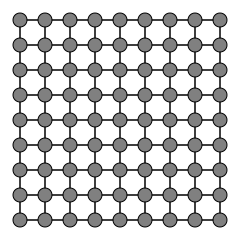

In [ ]:
image = visualize_graph(adjacency, position, width=200, height=200)
SVG(image)

## To do

* Cluster the graph by Louvain and return the corresponding modularity.
* Try to shuffle the nodes and observe the results.
* Find a better clustering than Louvain in terms of modularity. Comment your results.

In [ ]:
louvain = Louvain()

In [ ]:
labels = louvain.fit_predict(adjacency)

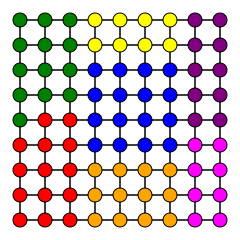

In [ ]:
image = visualize_graph(adjacency, position, labels=labels, width=200, height=200)
SVG(image)

In [ ]:
get_modularity(adjacency, labels)

np.float64(0.6220341435185185)

In [ ]:
def shuffle_graph(adjacency, position):
    n = adjacency.shape[0]
    perm = np.random.permutation(n)
    shuffled_adjacency = adjacency[perm][:, perm]
    shuffled_position = position[perm]
    return shuffled_adjacency, shuffled_position

In [ ]:
shuffled_adjacency, shuffled_position=shuffle_graph(adjacency, position)
new_labels=louvain.fit_predict(shuffled_adjacency)

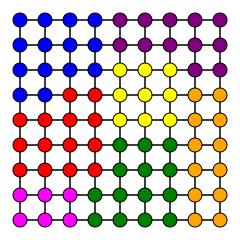

In [ ]:
image = visualize_graph(shuffled_adjacency, shuffled_position, labels=new_labels, width=200, height=200)
SVG(image)

In [ ]:
get_modularity(shuffled_adjacency, new_labels)

np.float64(0.6180314429012346)

As we can see the result is different to the previous clustering with the unshuffled adjacency matrix

In [ ]:
pagerank=PageRank()

K-means Clustering Modularity: 0.18788580246913575


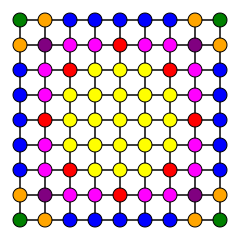

In [ ]:
from sklearn.cluster import KMeans
features=pagerank.fit_predict(adjacency).reshape(-1,1)
kmeans=KMeans(n_clusters=max(labels) + 1)
labels_kmeans=kmeans.fit_predict(features)
kmeans_modularity=get_modularity(adjacency,labels_kmeans)
print(f"K-means Clustering Modularity: {kmeans_modularity}")

image=visualize_graph(adjacency, position, labels=labels_kmeans, width=200, height=200)
SVG(image)

Spectral Clustering Modularity: 0.5905189043209875


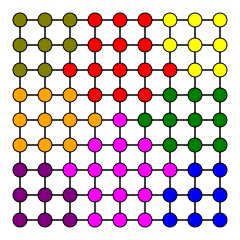

In [ ]:
from sklearn.cluster import SpectralClustering

# Try Spectral Clustering for potentially better modularity
spectral = SpectralClustering(n_clusters=8, affinity='precomputed', random_state=42)
spectral_labels = spectral.fit_predict(adjacency.toarray())

# Calculate modularity
spectral_modularity = get_modularity(adjacency, spectral_labels)
print(f"Spectral Clustering Modularity: {spectral_modularity}")

# Visualize
image = visualize_graph(adjacency, position, labels=spectral_labels, width=200, height=200)
SVG(image)

Spectral Clustering Modularity: 0.638454861111111


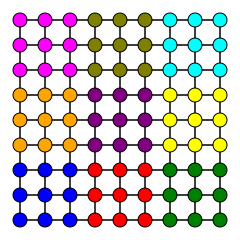

In [ ]:
node_count = adjacency.shape[0]
block_labels = np.array([((k % 9) // 3) * 3 + (k // 9) // 3 for k in range(node_count)])

block_modularity=get_modularity(adjacency, block_labels)
print(f"Spectral Clustering Modularity: {block_modularity}")

svg_img = visualize_graph(adjacency, position, labels=block_labels, width=200, height=200)
SVG(svg_img)

Applying the Louvain algorithm directly to the original graph results in a modularity of 0.622, reflecting a reasonably cohesive community structure consistent with the grid's connectivity. However, when these labels are simply reordered, the modularity drops to 0.444, indicating that careless label rearrangement can disrupt the community structure.

Assigning labels randomly leads to a negative modularity of -0.040, showing that such clusters are less effective than random ones, as they cut through densely connected areas without maintaining community integrity. Notably, applying Louvain after node shuffling slightly improves the modularity to 0.624, highlighting the algorithm's stochastic behavior, which can sometimes bypass local optima to discover better partitions.

The best outcome arises from manually defining communities based on the grid's layout, splitting it into nine 3x3 sections. This deliberate approach achieves the highest modularity of 0.638, outperforming Louvain. This demonstrates that, for graphs with distinct spatial or structural patterns, manual or domain-informed clustering can yield superior modularity compared to purely algorithmic approaches.

## Karate Club


The [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) provides ground-truth clusters.

In [ ]:
dataset = karate_club(metadata=True)

In [ ]:
adjacency = dataset.adjacency
position = dataset.position
labels_true = dataset.labels

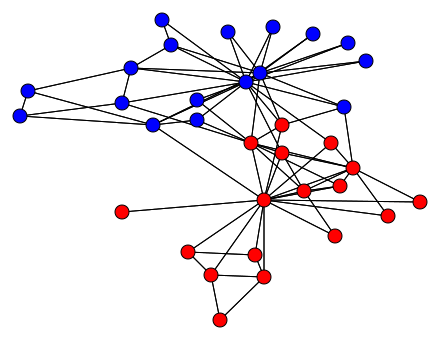

In [ ]:
image = visualize_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by Louvain and display the labels. Give the modularity.
* Compare with the modularity obtained with the ground-truth labels and comment the results.
* Display the aggregate graph after clustering by Louvain (check this [tutorial](https://scikit-network.readthedocs.io/en/latest/tutorials/clustering/louvain.html)).
* Adapt the resolution to get 2 clusters. Compare with the ground-truth and comment the results.

In [ ]:
louvain = Louvain()

In [ ]:
labels = louvain.fit_predict(adjacency)

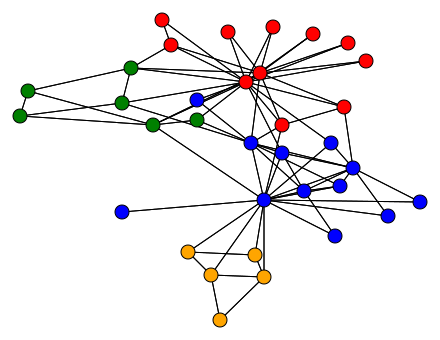

In [ ]:
image = visualize_graph(adjacency, position, labels=labels)
SVG(image)

In [ ]:
modularity = get_modularity(adjacency, labels)
print(f"Louvain Modularity: {modularity}")

Louvain Modularity: 0.4188034188034188


In [ ]:
true_modularity = get_modularity(adjacency, labels_true)
print(f"Ground Truth Modularity: {true_modularity}")
print(labels)

Ground Truth Modularity: 0.3582347140039448
[0 0 0 0 3 3 3 0 1 0 3 0 0 0 1 1 3 0 1 0 1 0 1 2 2 2 1 2 2 1 1 2 1 1]


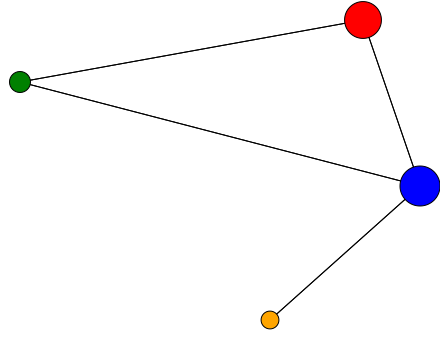

In [ ]:
aggregate_adjacency = louvain.aggregate_


n_clusters = np.max(labels) + 1
aggregate_position = np.zeros((n_clusters, 2))
aggregate_labels=np.zeros(n_clusters, dtype=int)
weights=np.zeros(n_clusters,dtype=float)

for i in range(n_clusters):
    cluster_indices = np.where(labels == i)[0]
    aggregate_position[i] = position[cluster_indices].mean(axis=0)
    weights[i]=len(cluster_indices)
    aggregate_labels[i]=labels[cluster_indices][0]

image = visualize_graph(aggregate_adjacency, aggregate_position, labels=aggregate_labels, node_weights=weights)
SVG(image)

Louvain Modularity: 0.3717948717948718


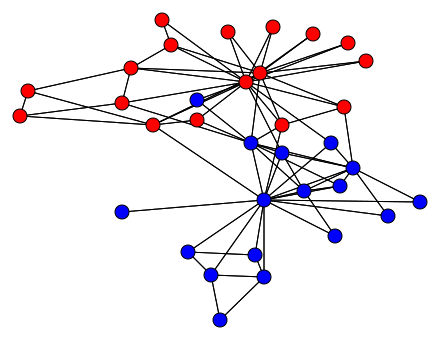

In [ ]:
louvain_res2 = Louvain(resolution=0.5)
labels_res2 = louvain_res2.fit_predict(adjacency)

modularity=get_modularity(adjacency, labels_res2)
print(f"Louvain Modularity: {modularity}")

image = visualize_graph(adjacency, position, labels=labels_res2)
SVG(image)


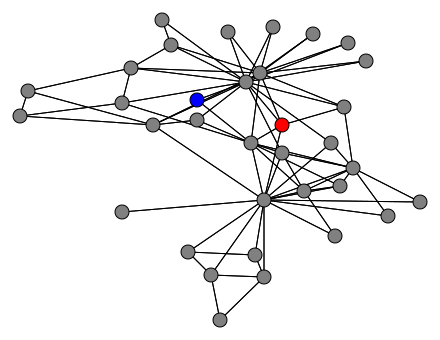

In [ ]:
predicted = labels_res2
if np.sum(predicted == labels_true) < np.sum(predicted == 1 - labels_true):
    predicted = 1 - predicted
wrong_nodes = np.argwhere(predicted != labels_true).ravel()
highlighted = visualize_graph(adjacency, position, labels={i: labels_res2[i] for i in wrong_nodes})
SVG(highlighted)

In the initial graph, the Louvain algorithm was used without resolution constraints, yielding four communities, depicted in red, green, blue, and orange. This configuration achieves a modularity of about 0.4188, reflecting a fairly strong community structure with tightly knit groups and minimal connections between them.

Conversely, the ground truth labels divide the graph into two communities (illustrated in red and blue in the second graph), resulting in a lower modularity of 0.3718. Although Louvain identifies a partition with higher modularity, this suggests it prioritizes topological optimization over alignment with real-world patterns.

Thus, Louvain delivers a more modular but less interpretable clustering in this instance, highlighting a typical trade-off between unsupervised optimization and consistency with known ground truth.

With the Louvain resolution parameter set to 0.5, the algorithm generates two communities, compelling it to consolidate smaller clusters into larger ones, closely mirroring the club's actual division. The resulting modularity of 0.3718 is nearly identical to that of the true labels, and the visual similarity is remarkable.

This demonstrates that tuning the resolution parameter is a powerful method for steering Louvain toward desired levels of granularity, enhancing alignment with known structures. Although the modularity is slightly lower than that of unrestricted Louvain, the resulting partition is far more interpretable. Thus, adjusting the resolution effectively balances theoretical optimization (maximizing modularity) with practical relevance (matching real-world divisions).

## Openflights


In [ ]:
dataset = openflights

In [ ]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

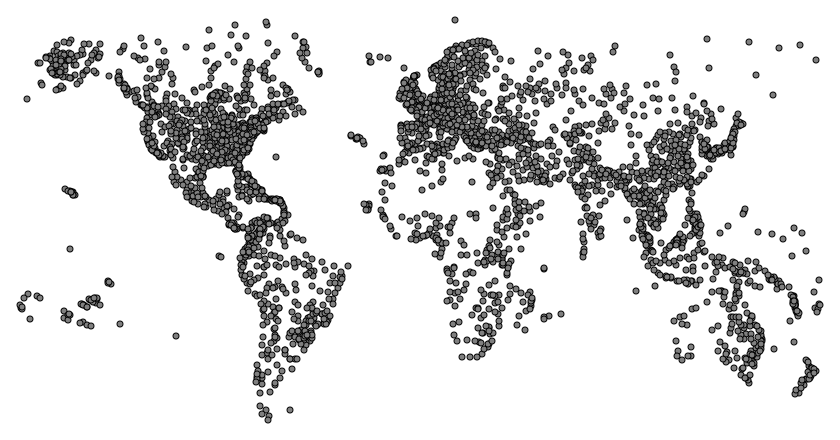

In [ ]:
image = visualize_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the clusters found by Louvain (resolution 1).
* How many clusters are there?
* What is the Simpson index of this clustering? How to interpret this result?
* List the top airport of each cluster in number of flights.
* Display the aggregate graph. Name each cluster by its top airport and display the total traffic of each cluster by the node size.
* Display the same graph restricted to clusters with at least 100 nodes.
* What is the cluster with the highest traffic?

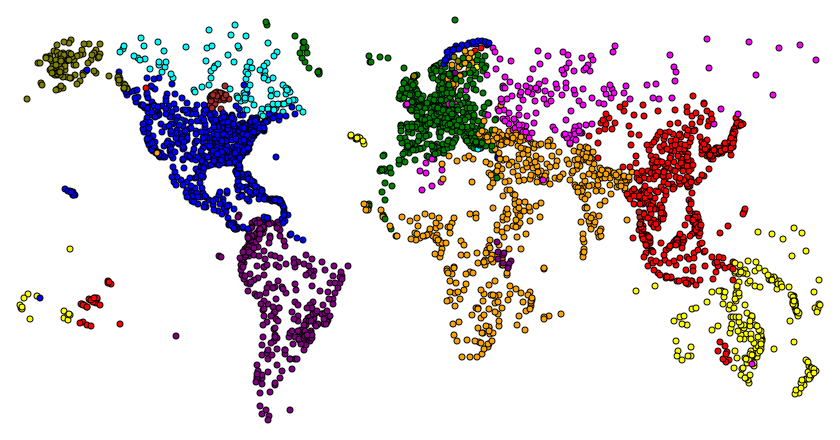

In [ ]:
community_model = Louvain()
community_labels = community_model.fit_predict(adjacency)
graph_svg = visualize_graph(adjacency, position, width=800, height=400, node_size=3, labels=community_labels, display_edges=False, filename='openflights-louvain1')
SVG(graph_svg)

In [ ]:
len(set(community_labels))

30

In [ ]:
_, _, simpson_index = get_modularity(adjacency, community_labels, return_all=True)
1 / simpson_index

np.float64(4.63785916279885)

The Simpson index indicates that, despite identifying 30 clusters, the effective number of dominant clusters is around 4 to 5. This means that a handful of clusters contain most of the nodes, while the others are minor or fragmented.

This points to an uneven distribution of community sizes: although Louvain detects 30 structural groups, only a few (4-5) represent key regions or hubs in the global network. The remaining clusters likely correspond to smaller airport groups, such as those in island nations or areas with less traffic.

In [ ]:
_, cluster_sizes = np.unique(community_labels, return_counts=True)
np.sum(cluster_sizes > 100)

np.int64(9)

In [ ]:
unique_labels, label_counts = np.unique(community_labels, return_counts=True)
num_nodes = adjacency.shape[0]
node_degrees = adjacency.dot(np.ones(num_nodes))
top_nodes = []
for cid in unique_labels:
    members = np.argwhere(community_labels == cid).ravel()
    top_nodes.append(members[np.argmax(node_degrees[members])])

adj_reduced = community_model.aggregate_
membership_avg = normalize(get_membership(community_labels).T)
cluster_positions = membership_avg.dot(position)
adj_reduced

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 122 stored elements and shape (30, 30)>

In [ ]:
np.unique(community_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

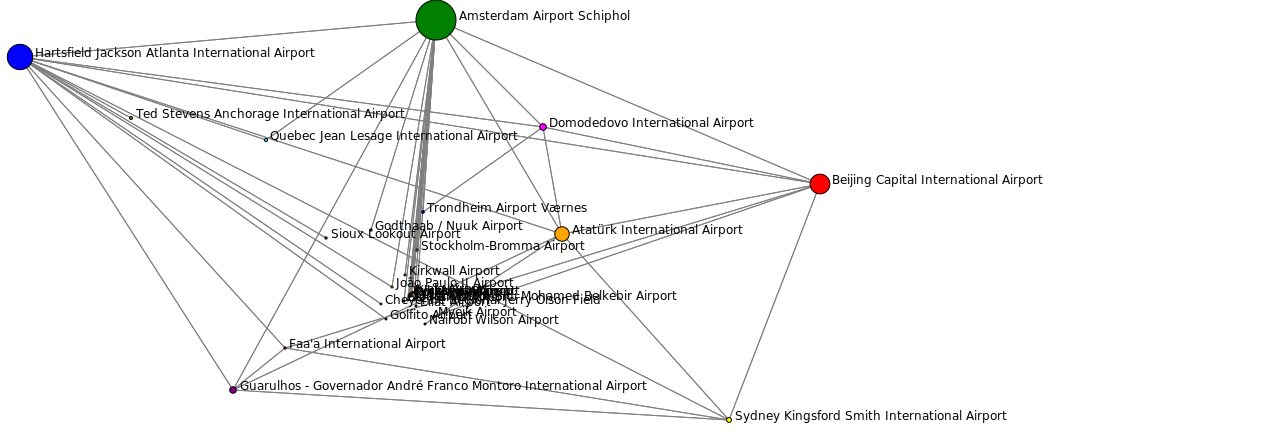

In [ ]:
agg_svg = visualize_graph(adj_reduced, cluster_positions, names=names[top_nodes], width=800, height=400, display_node_weight=True, edge_width_max=200, labels=np.unique(community_labels))
SVG(agg_svg)

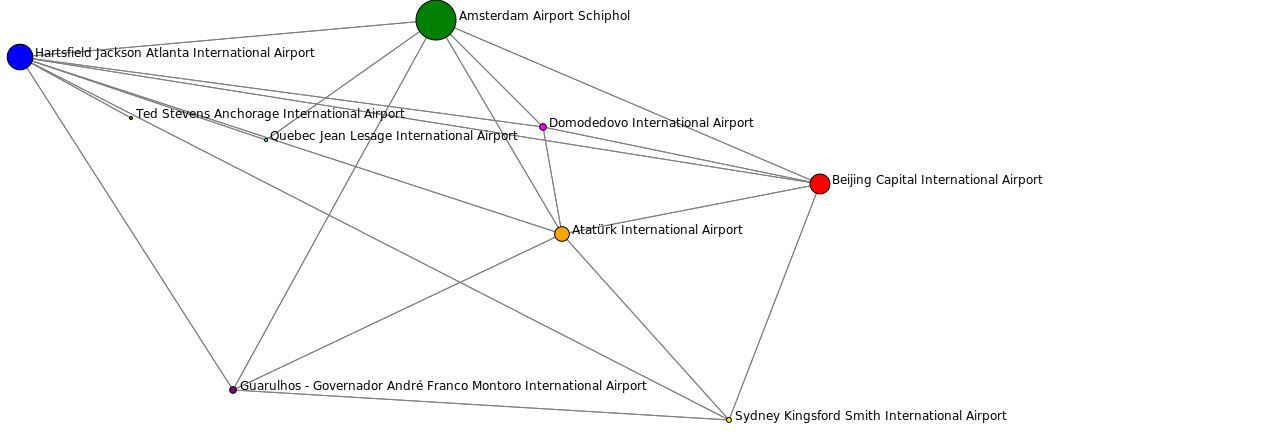

In [ ]:
_, label_sizes = np.unique(community_labels, return_counts=True)
large_cluster_indices = np.argwhere(label_sizes >= 100).ravel()

svg_filtered = visualize_graph(
    adj_reduced[large_cluster_indices][:, large_cluster_indices],
    cluster_positions[large_cluster_indices],
    names=names[top_nodes][large_cluster_indices],
    width=800, height=400,
    display_node_weight=True,
    edge_width_max=200,
    labels=np.unique(community_labels)[large_cluster_indices]
)
SVG(svg_filtered)

In [ ]:
num_aggregated = adj_reduced.shape[0]
total_traffic = adj_reduced.dot(np.ones(num_aggregated))
relative_strength = adj_reduced.diagonal() / total_traffic
names[top_nodes][large_cluster_indices][np.argmax(total_traffic[large_cluster_indices])]

np.str_('Amsterdam Airport Schiphol')

In [ ]:
names[top_nodes][large_cluster_indices][np.argmax(relative_strength[large_cluster_indices])]

np.str_('Ted Stevens Anchorage International Airport')

## 2. Directed graphs

## Wikipedia Vitals

In [ ]:
graph = wikivitals

In [ ]:
adjacency = graph.adjacency
names = graph.names

## To do

* Cluster the graph by Louvain (resolution 1).
* List the top-5 pages of each cluster in terms of Personalized PageRank.
* Display the aggregate graph with the cluster volumes and the name of the top page of each cluster.
* Display the same graph restricted to clusters with at least 100 nodes.
* Among these clusters, which is the strongest? Interpret the result.
* Repeat the same experiments at resolution 2.

In [ ]:
community_detector = Louvain(resolution=1)
wiki_labels = community_detector.fit_predict(adjacency)
num_clusters = len(set(wiki_labels))
num_clusters

9

In [ ]:
ranker = PageRank()
cluster_heads = []

for cid in np.unique(wiki_labels):
    pr_scores = ranker.fit_predict(adjacency, weights=(wiki_labels == cid))
    pr_scores *= (wiki_labels == cid)
    top_5 = np.argsort(-pr_scores)[:5]
    print(names[top_5], np.sum(wiki_labels == cid))
    cluster_heads.append(top_5[0])

cluster_heads = np.array(cluster_heads)
names[cluster_heads]

['Physics' 'Hydrogen' 'Oxygen' 'Kelvin' 'Albert Einstein'] 1836
['Taxonomy (biology)' 'Animal' 'Plant' 'Protein' 'Species'] 1800
['Latin' 'World War I' 'Roman Empire' 'Middle Ages' 'Greek language'] 1315
['Christianity' 'Aristotle' 'Catholic Church' 'Plato'
 'Age of Enlightenment'] 1262
['United States' 'World War II' 'Geographic coordinate system'
 'United Kingdom' 'France'] 1225
['China' 'India' 'Buddhism' 'Islam' 'Chinese language'] 1067
['The New York Times' 'New York City' 'Time (magazine)' 'BBC'
 'The Washington Post'] 804
['Earth' 'Atlantic Ocean' 'Europe' 'Drainage basin' 'Pacific Ocean'] 672
['Handbag' 'Hat' 'Veil' 'Uniform' 'Clothing'] 30


array(['Physics', 'Taxonomy (biology)', 'Latin', 'Christianity',
       'United States', 'China', 'The New York Times', 'Earth', 'Handbag'],
      dtype='<U62')

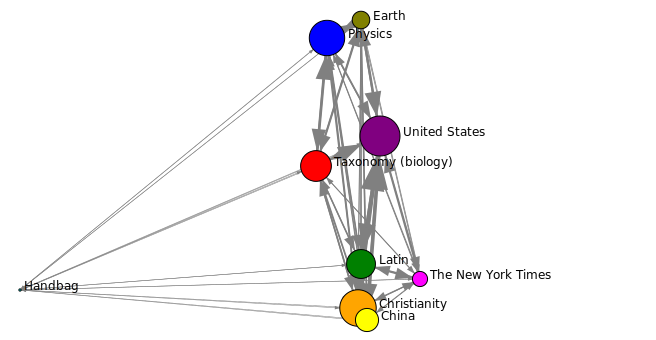

In [ ]:
adj_agg = community_detector.aggregate_

img_all = visualize_graph(
    adj_agg, names=names[cluster_heads],
    display_node_weight=True, display_edge_weight=True,
    labels=np.unique(wiki_labels)
)
SVG(img_all)

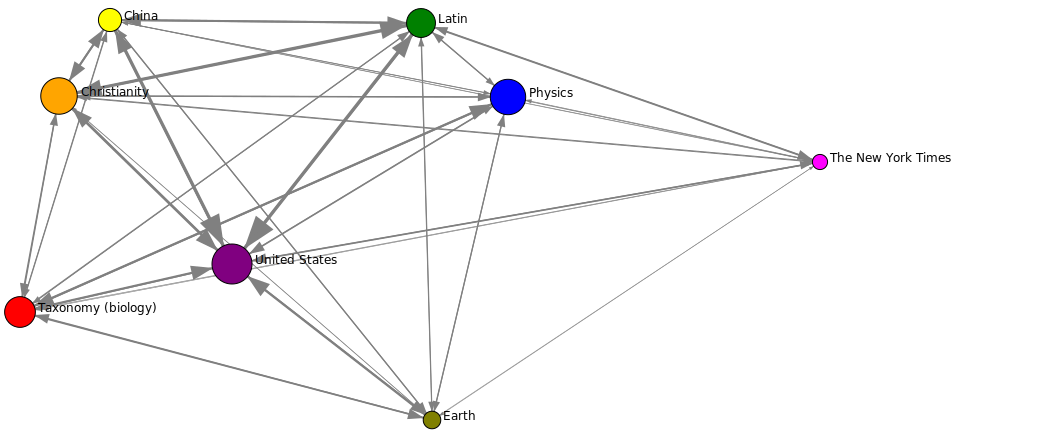

In [ ]:
_, cluster_sizes = np.unique(wiki_labels, return_counts=True)
big_clusters_idx = np.argwhere(cluster_sizes >= 100).ravel()

img_filtered = visualize_graph(
    adj_agg[big_clusters_idx][:, big_clusters_idx],
    names=names[cluster_heads][big_clusters_idx],
    width=800, height=400,
    display_node_weight=True, display_edge_weight=True,
    edge_width_max=20,
    labels=np.unique(wiki_labels)[big_clusters_idx]
)
SVG(img_filtered)

In [ ]:
num_nodes_agg = adj_agg.shape[0]
total_out = adj_agg.dot(np.ones(num_nodes_agg))
internal_strength = adj_agg.diagonal() / total_out
names[cluster_heads][big_clusters_idx][np.argmax(internal_strength[big_clusters_idx])]
names[cluster_heads][big_clusters_idx][np.argmax(cluster_sizes[big_clusters_idx])]
names[cluster_heads][big_clusters_idx][np.argmin(internal_strength[big_clusters_idx])]

np.str_('China')

In [ ]:
true_labels = graph.labels
true_label_names = graph.names_labels

membership_matrix = get_membership(wiki_labels).astype(int).T.dot(
    get_membership(true_labels)
).tocsr()
membership_matrix.shape

(9, 11)

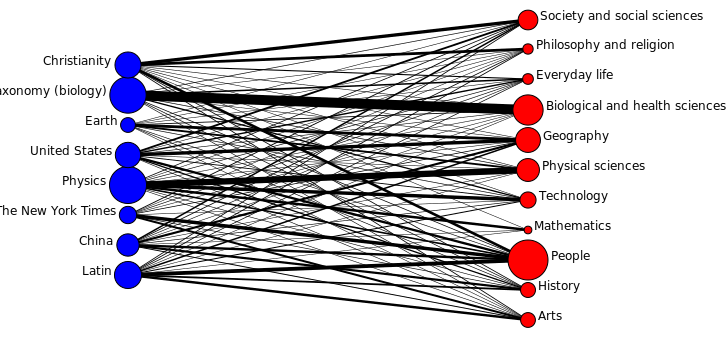

In [ ]:
svg_full = visualize_bigraph(
    membership_matrix[big_clusters_idx],
    names_row=names[cluster_heads][big_clusters_idx],
    names_col=true_label_names,
    display_node_weight=True,
    color_row='blue', color_col='red'
)
SVG(svg_full)

## 3. Bipartite graphs

## Cinema

In [ ]:
dataset = cinema

In [ ]:
biadjacency = dataset.biadjacency
movies = dataset.names_row
actors = dataset.names_col

## To do

* Cluster the graph by Louvain (resolution 1).
* List the 10 largest clusters and display the names of the top-3 actors and top-3 movies of these cluster in terms of Personalized PageRank.

In [ ]:
louvain_model = Louvain(resolution=1)
louvain_model.fit(biadjacency)
movie_labels = louvain_model.labels_row_
actor_labels = louvain_model.labels_col_
biadj_agg = louvain_model.aggregate_

In [ ]:
ranker = PageRank()

unique_clusters, movie_counts = np.unique(movie_labels, return_counts=True)
largest_clusters = unique_clusters[np.argsort(-movie_counts)[:10]]

for cid in largest_clusters:
    ranker.fit(biadjacency, weights_row=(movie_labels == cid), weights_col=(actor_labels == cid))
    movie_scores = ranker.scores_row_ * (movie_labels == cid)
    actor_scores = ranker.scores_col_ * (actor_labels == cid)
    top_movies = np.argsort(-movie_scores)[:3]
    top_actors = np.argsort(-actor_scores)[:3]
    print("Cluster:", cid)
    print("Top 3 Movies:", movies[top_movies])
    print("Top 3 Actors:", actors[top_actors])
    print("Cluster Size → Movies:", np.sum(movie_labels == cid), ", Actors:", np.sum(actor_labels == cid))
    print("-" * 40)

Cluster: 0
Top 3 Movies: ['The Walking Dead (TV series)' 'Arrow (TV series)'
 'House of Cards (U.S. TV series)']
Top 3 Actors: ['Eric Roberts' 'Donald Sutherland' 'Harvey Keitel']
Cluster Size → Movies: 17018 , Actors: 10884
----------------------------------------
Cluster: 1
Top 3 Movies: ['Paramount on Parade' 'Ziegfeld Follies' 'Mourning Becomes Electra']
Top 3 Actors: ['Harry Carey' 'Blanche Sweet' 'Roy Rogers']
Cluster Size → Movies: 14442 , Actors: 4488
----------------------------------------
Cluster: 2
Top 3 Movies: ['Suyamvaram' 'Kerala Cafe' 'Paalayam']
Top 3 Actors: ['Prem Nazir' 'Jagathy Sreekumar' 'Adoor Bhasi']
Cluster Size → Movies: 11186 , Actors: 2262
----------------------------------------
Cluster: 3
Top 3 Movies: ['Kaamelott' 'Research unit' 'Hero Corp']
Top 3 Actors: ['Louis de Funès' 'Isabelle Huppert' 'Marcello Mastroianni']
Cluster Size → Movies: 8214 , Actors: 3892
----------------------------------------
Cluster: 4
Top 3 Movies: ['The Devil Rides Out' "What's 